In [0]:
import pandas as pd

In [3]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
# filmes é um DataFrame
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [0]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")

In [8]:
notas_medias_por_filme

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [9]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


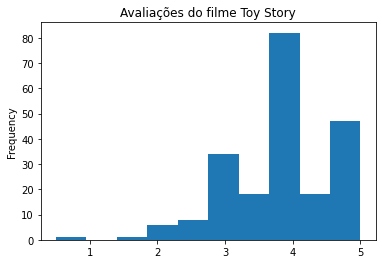

In [10]:
import matplotlib.pyplot as plt

avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')
plt.title("Avaliações do filme Toy Story")
plt.show()

In [11]:
filmes["generos"].str.get_dummies('|')

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
filmes["generos"].str.get_dummies('|').sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [13]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

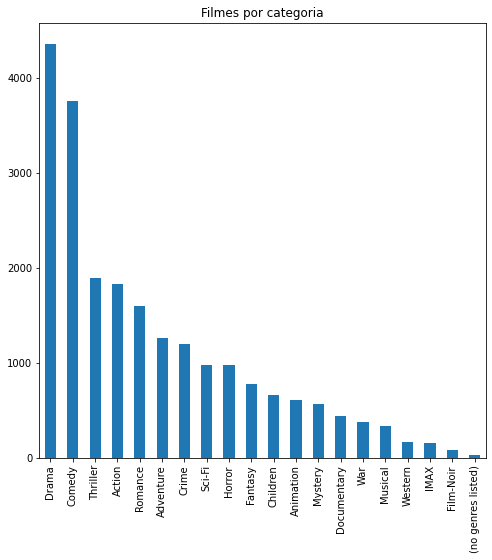

In [14]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='bar', 
    title='Filmes por categoria',
    figsize=(8,8))
plt.show()

Desafio 1 do Guilherme Silveira
Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

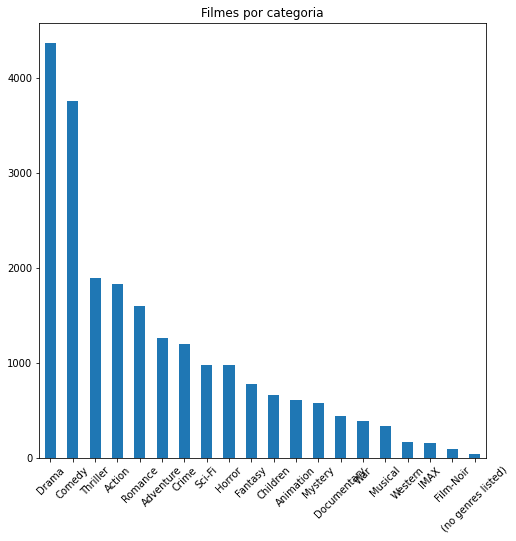

In [18]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='bar', 
    title='Filmes por categoria',
    figsize=(8,8))
plt.xticks(rotation='45')
plt.show()

Desafio 2 do Paulo Silveira
Encontar vários filmes com médias próximas e distribuições diferentes, use a função plot_filmes(n) para plotar.

In [19]:
filmes_com_media.sort_values("nota", ascending=False)[3100:3120]

,filmeId,titulo,generos,nota
2592,3467,Hud (1963),Drama|Western,3.75000
7707,90057,Take Shelter (2011),Drama,3.75000
9522,171765,Okja (2017),Action|Adventure|Drama|Sci-Fi,3.75000
7705,89939,Gigi (1949),Comedy,3.75000
5465,26159,Tokyo Drifter (Tôkyô nagaremono) (1966),Action|Crime|Drama,3.75000
2569,3436,Dying Young (1991),Drama|Romance,3.75000
3814,5341,Lenny (1974),Drama,3.75000
6097,42191,Luxo Jr. (1986),Animation|Children,3.75000
5479,26249,They Call Me Trinity (1971),Comedy|Western,3.75000
1029,1341,Burnt Offerings (1976),Horror,3.75000


#Filme 7705	89939	Gigi (1949)	Comedy	3.75000
#Filme 8947	136562	Steve Jobs (2015)	Drama	3.75000

In [0]:

def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  plt.show()
  print('\n')
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()


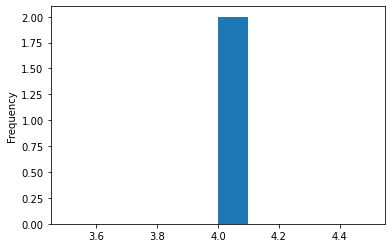

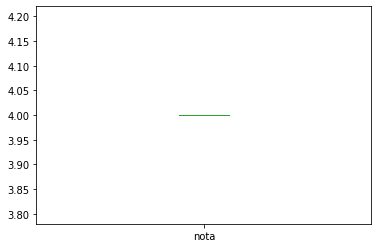

count    2.0
mean     4.0
std      0.0
min      4.0
25%      4.0
50%      4.0
75%      4.0
max      4.0
Name: nota, dtype: float64

In [21]:
plot_filme(7705)

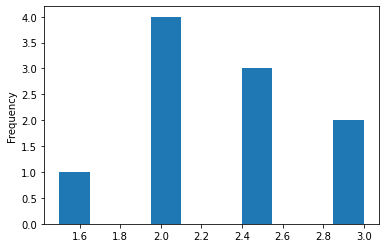

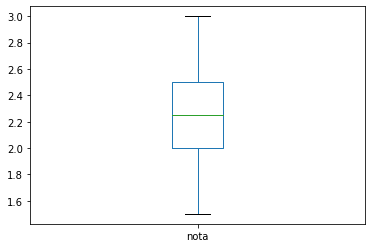

count    10.000000
mean      2.300000
std       0.483046
min       1.500000
25%       2.000000
50%       2.250000
75%       2.500000
max       3.000000
Name: nota, dtype: float64

In [22]:
plot_filme(8947)

Desafio 3 do Paulo Silveira
Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

In [0]:
import pandas.util.testing as tm

In [0]:
#Agrupando os 10 melhores filmes
top_10_filmes = avaliacoes.groupby('filmeId')['filmeId'].count().sort_values(ascending=False).head(10)

#Separando a base de avaliações para os 10 melhores filmes
top_10_filmes_avaliacoes = avaliacoes[avaliacoes['filmeId'].isin(top_10_filmes.index)]




In [0]:
#plotando o conjunto de BoxPlots



In [0]:
import seaborn as sns

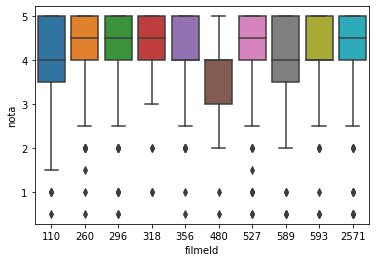

In [31]:
sns.boxplot(data = top_10_filmes_avaliacoes, x='filmeId', y='nota')

Desafio 4 do Guilherme Silveira
Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

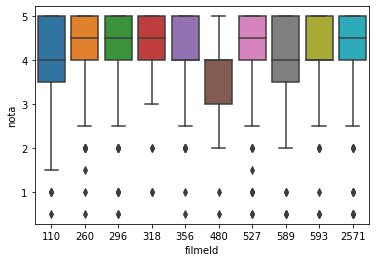

In [32]:
sns.boxplot(data=top_10_filmes_avaliacoes, x='filmeId', y='nota')

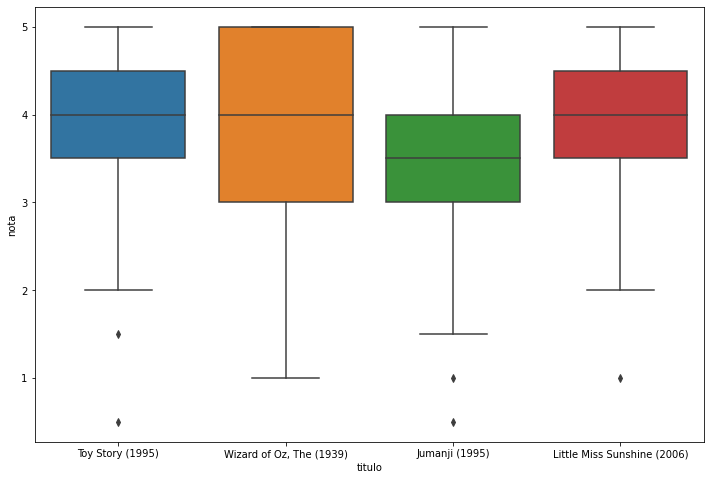

In [33]:
data1 = avaliacoes.query("filmeId in [1,2,919,46578]")
data1 = data1.merge(filmes,how='left',on='filmeId')

plt.figure(figsize=(12,8))
sns.boxplot(data =data1, x ="titulo", y="nota")
plt.show()

Desafio 5 do Allan Spadini
Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [34]:
#adiciona coluna com mediana
filmes_com_media = filmes_com_media.join(avaliacoes.groupby("filmeId")["nota"].median(), on="filmeId").rename(columns={"nota":"nota_mediana"})
#adiciona coluna com moda
filmes_com_media = filmes_com_media.join(avaliacoes.groupby("filmeId").agg(pd.Series.mode), on="filmeId").rename(columns={"nota":"nota_moda"})
filmes_com_media

ValueError: ignored